In [3]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## Split the Data into Training and Testing Sets

### Step 1: Read the `heart.csv` data from the `static` folder into a Pandas DataFrame.

In [17]:
# Load dataset 
data = pd.read_csv('static/heart.csv')

data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [18]:
print(data.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [19]:
# List of columns to convert
columns_to_convert = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Loop through the columns and create binary columns
for column in columns_to_convert:
    unique_values = data[column].unique()
    for value in unique_values:
        data[f'{column}_{value.lower()}'] = (data[column] == value).astype(int)

# Drop the original columns
data.drop(columns=columns_to_convert, inplace=True)

# print(data.head(10))

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   
5   39        120          339          0    170      0.0             0   
6   45        130          237          0    170      0.0             0   
7   54        110          208          0    142      0.0             0   
8   37        140          207          0    130      1.5             1   
9   48        120          284          0    120      0.0             0   

   Sex_m  Sex_f  ChestPainType_ata  ...  ChestPainType_asy  ChestPainType_ta  \
0      1      0                  1  ...                  0                 0   
1      0      

In [ ]:
################################

In [4]:
# START - Load Integer dataset: heart_integer_v01.csv
data2 = pd.read_csv('static_[null]/heart_integer_v01.csv')

data2.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_m,Sex_f,ChestPainType_ata,...,ChestPainType_asy,ChestPainType_ta,RestingECG_normal,RestingECG_st,RestingECG_lvh,ExerciseAngina_n,ExerciseAngina_y,ST_Slope_up,ST_Slope_flat,ST_Slope_down
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
1,49,160,180,0,156,1.0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
3,48,138,214,0,108,1.5,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
5,39,120,339,0,170,0.0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
6,45,130,237,0,170,0.0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
7,54,110,208,0,142,0.0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
8,37,140,207,0,130,1.5,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
9,48,120,284,0,120,0.0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0


In [5]:
# Drop specified columns // DONT NEED COLUMNS b/c Binary Output: M/F
columns_to_drop = ['Sex_f', 'ExerciseAngina_n']
data2 = data2.drop(columns=columns_to_drop)

# Verify the changes
print(data2.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_m', 'ChestPainType_ata', 'ChestPainType_nap',
       'ChestPainType_asy', 'ChestPainType_ta', 'RestingECG_normal',
       'RestingECG_st', 'RestingECG_lvh', 'ExerciseAngina_y', 'ST_Slope_up',
       'ST_Slope_flat', 'ST_Slope_down'],
      dtype='object')


In [6]:
# Split into features (X) and target variable (y)
X = data2.drop('HeartDisease', axis=1)
y = data2['HeartDisease']

In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Build and train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, max_samples=300, random_state=50)
rf_classifier.fit(X_train, y_train)

# (n_estimators=200, random_state=50)

RandomForestClassifier(max_depth=10, max_samples=300, random_state=50)

In [9]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [11]:
### print("----------------------------------------------------------")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("----------------------------------------------------------")

# Other classification metrics
print(classification_report(y_test, y_pred))

print("----------------------------------------------------------")

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("----------------------------------------------------------")

# Feature importance
print("Feature Importance:\n", rf_classifier.feature_importances_)

print("----------------------------------------------------------")

Accuracy: 0.875
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

----------------------------------------------------------
Confusion Matrix:
 [[67 10]
 [13 94]]
----------------------------------------------------------
Feature Importance:
 [0.08571618 0.06281205 0.08861756 0.02479966 0.09585969 0.10041524
 0.0380668  0.027519   0.01528212 0.07403467 0.00477003 0.01280844
 0.00872298 0.01351786 0.10687252 0.14181316 0.09029955 0.00807249]
----------------------------------------------------------


In [14]:
rf_classifier.classes_

array([0, 1])

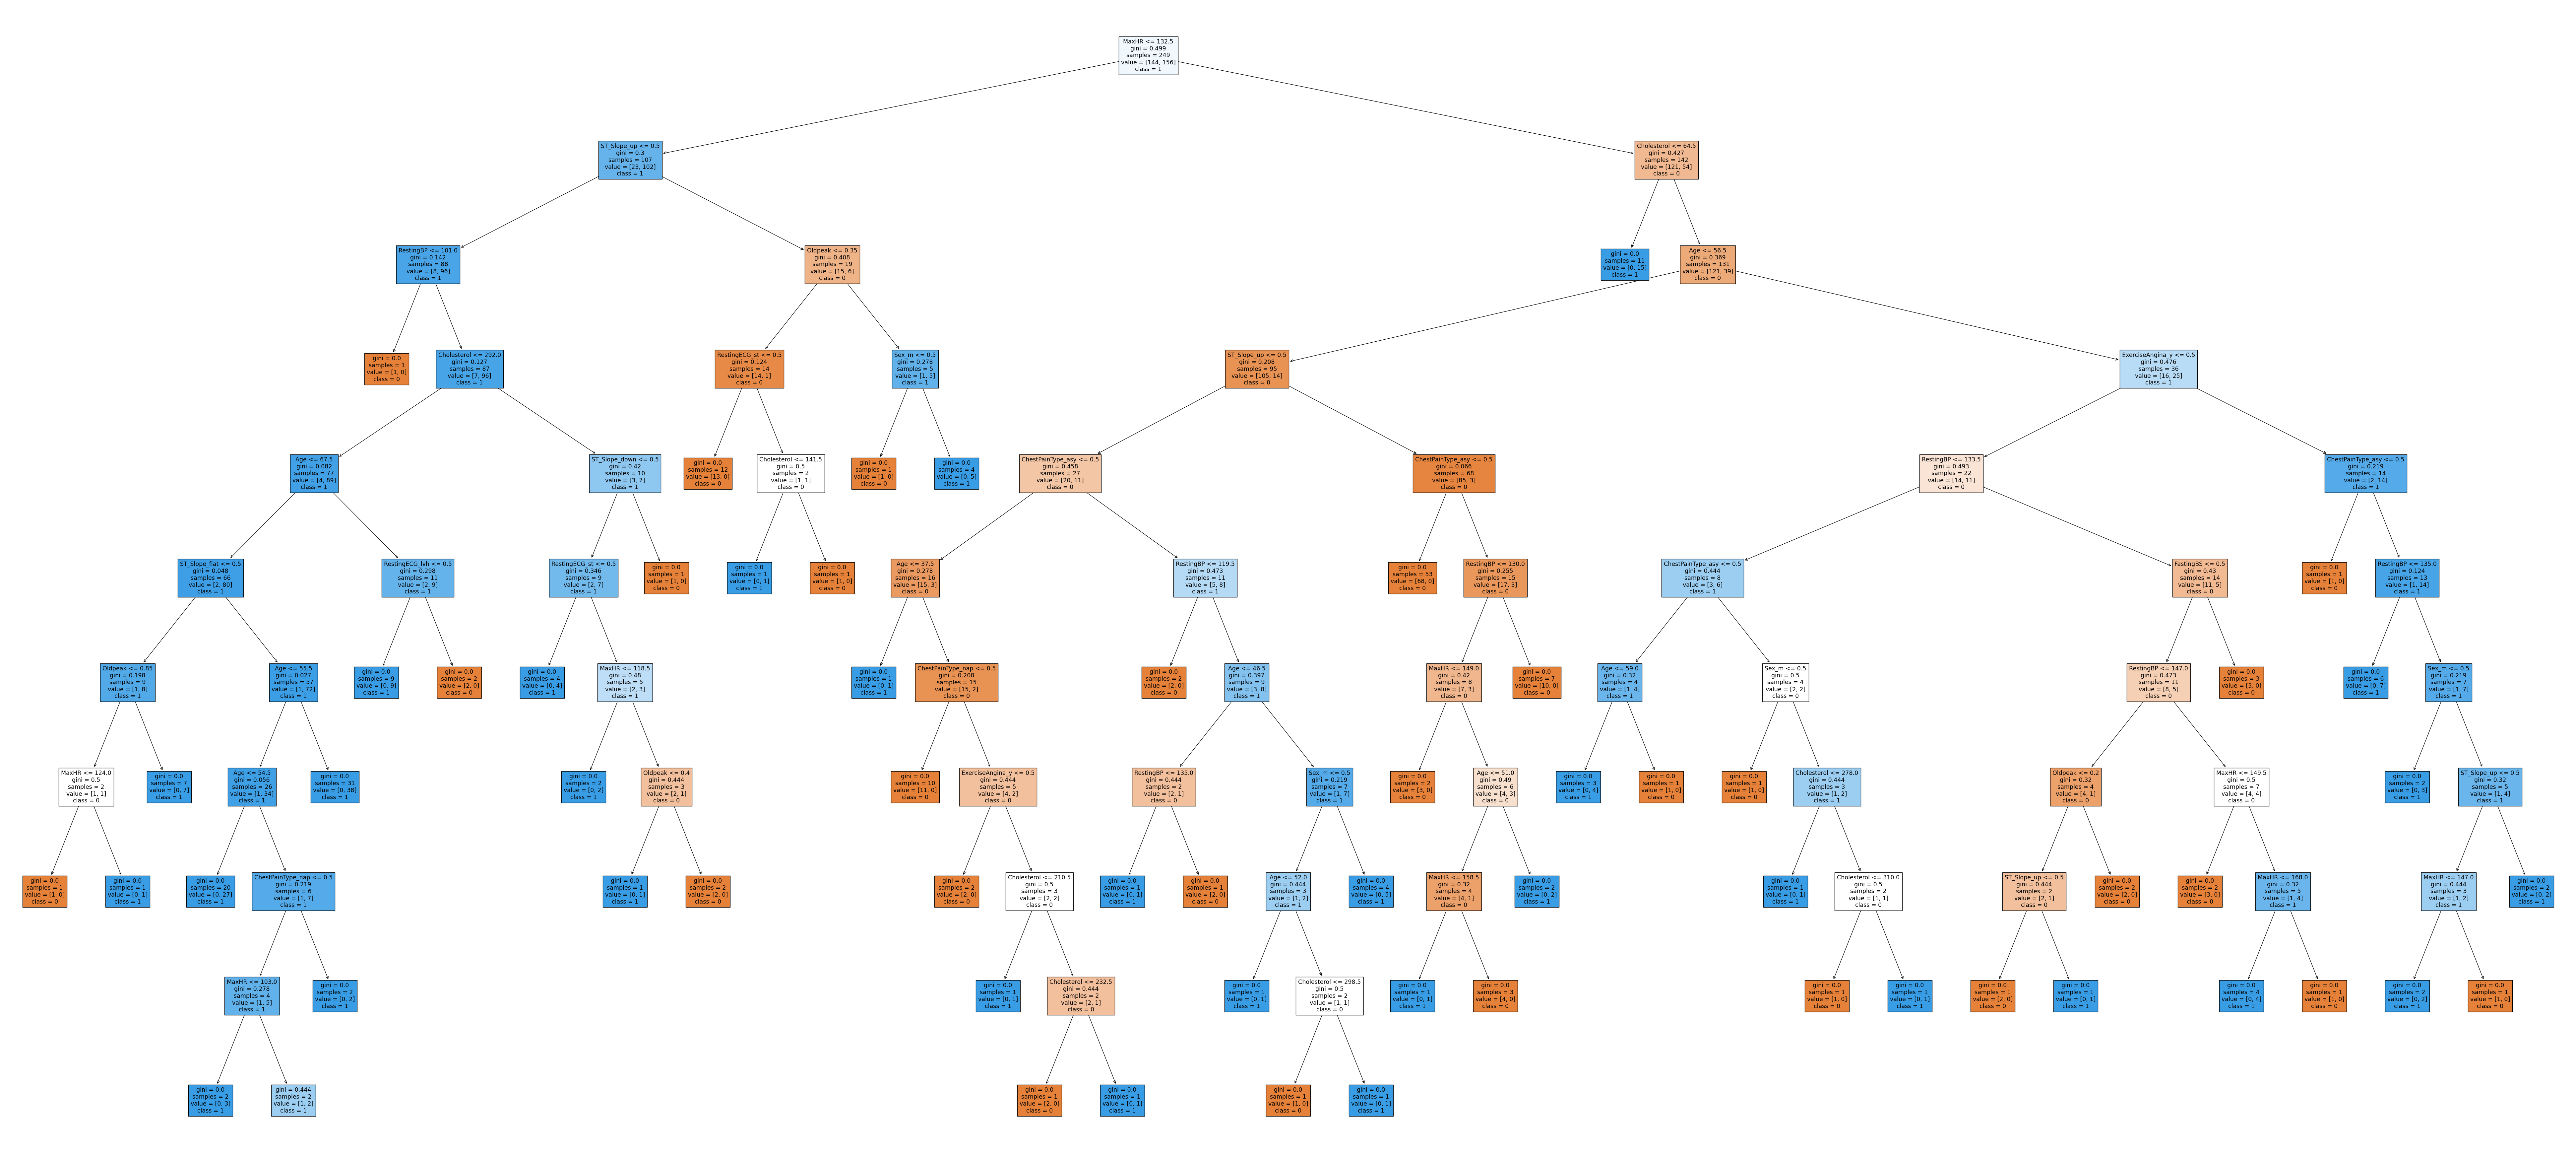

In [16]:
# Andrews Tree

from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,45))
_ = tree.plot_tree(rf_classifier.estimators_[1],
                   feature_names=X.columns, class_names=["0","1"],
                   filled=True)

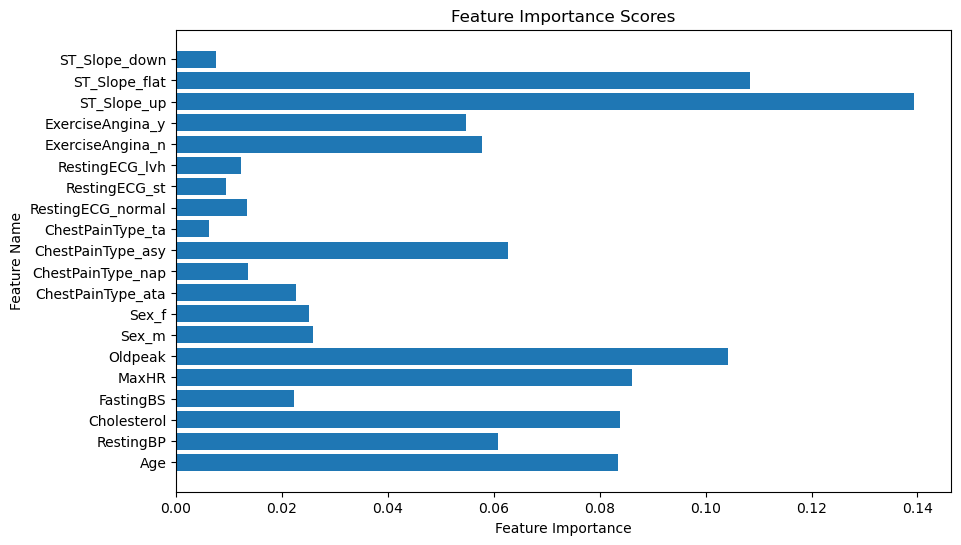

In [79]:
import matplotlib.pyplot as plt

# Feature names (column names)
feature_names = X.columns

# Feature importance scores
feature_importance = rf_classifier.feature_importances_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Scores')
plt.show()